# Solving a Regression Problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Data Example (one feature)

In [3]:
dat=np.loadtxt(fname = 'regData1.txt', delimiter = ',')

In [5]:
n_sample=dat.shape[0]
print(dat.shape)
print(n_sample)

(40, 2)
40


In [11]:
np.random.seed(0)
rindex=np.random.permutation(n_sample)
print(rindex)
ncut=int(n_sample/4)

[22 20 25  4 10 15 28 11 18 29 27 35 37  2 39 30 34 16 36  8 13  5 17 14 33
  7 32  1 26 12 31 24  6 23 21 19  9 38  3  0]


In [24]:
X_train=dat[rindex[: -ncut], 0].reshape(-1, 1)
Y_train=dat[rindex[: -ncut], 1].reshape(-1, 1)
X_test=dat[rindex[-ncut:], 0].reshape(-1, 1)
Y_test=dat[rindex[-ncut:], 1].reshape(-1, 1)

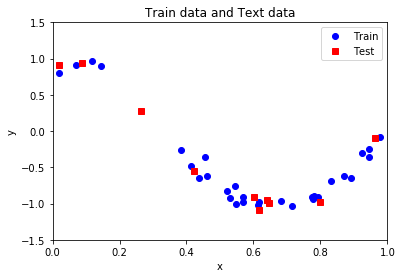

In [18]:
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.plot(X_train, Y_train, 'bo', label='Train')
plt.plot(X_test, Y_test, 'rs', label='Test')
plt.title('Train data and Text data')
plt.xlabel('x')
plt.ylabel('y')
_=plt.legend(loc='best')

### Linear Regression

In [21]:
linReg=LinearRegression()

In [26]:
linReg.fit(X_train, Y_train)    ### 이때 x, y 변수가 반드시 shape(-1, 1) 형태여야 함 
print(linReg.coef_)

[[-1.41535017]]


In [29]:
xm=np.mean(X_train)
ym=np.mean(Y_train)
a=linReg.coef_
b=ym-a*xm
print(a, b)

[[-1.41535017]] [[ 0.3527202]]


In [34]:
Y_pred = linReg.predict(X_train)
linTrainError = np.mean((Y_pred - Y_train)**2)
print(linTrainError)

0.227489566313


In [35]:
Y_pred = linReg.predict(X_test)
linTestError = np.mean((Y_pred - Y_test)**2)
print(linTestError)

0.273265172457


In [36]:
xval=np.linspace(0, 1, 101).reshape(-1,1)
yval=linReg.predict(xval).reshape(-1,1)

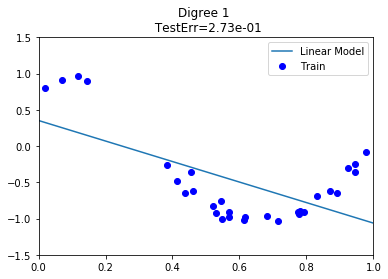

In [38]:
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.plot(xval, yval, label='Linear Model')
plt.plot(X_train, Y_train, 'bo', label='Train')
plt.legend(loc='best')
_=plt.title('Digree {} \n TestErr={:.2e}'.format(1, linTestError))

### Quadratic Regression